<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>Datahackerman Final Project</b></font></div>
<div style = "text-align: leftt"><font><i>By 'Moyosade Jacob</i></font></div>
<div style = "text-align: leftt"><font>7th April 2023</font></div>

In [366]:
import pandas as pd
import os
import requests
import json
import seaborn as sns
import folium
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [297]:
# Main working folder
main_folder = os.getcwd()

In [298]:
# main Data folder 
data_folder = "data"

In [299]:
# Combining the paths
main_path = os.path.join(main_folder, data_folder)

In [300]:
# Getting the data list
files_list = os.listdir(main_path)

In [301]:
files_list

['csv_file.csv', 'json_file.json', 'txt_file.txt']

In [302]:
# Reading csv data file
csv_data = pd.read_csv(os.path.join(main_path, files_list[0]))

In [303]:
csv_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46


In [304]:
csv_data.shape

(1000, 9)

In [305]:
# Reading in text data file
text_data = pd.read_csv(os.path.join(main_path, files_list[2]), sep=',', header=0)

In [306]:
text_data.head(1)

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter


In [374]:
with open(os.path.join(main_path, files_list[1])) as file:
    json_data_original = json.load(file)

In [378]:
json_data = pd.json_normalize(json_data_original)

In [379]:
json_data.head()

,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter
1,1321,False,86271,-4.20,GB,57.79,@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott,-1,twitter
2,1952,False,11785,-0.07,GB,51.46,#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3,-1,twitter
3,629,False,22813,-0.17,GB,51.52,😴,0,twitter
4,509,False,8740,-2.67,GB,53.47,@sickkening Yep you're also that xx,1,twitter


### combine the dataFrame

In [380]:
csv_text_data = pd.concat([csv_data, text_data]).reset_index(drop=True)

In [381]:
len(csv_text_data )

2000

In [382]:
csv_text_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


In [383]:
csv_text_data.shape

(2000, 9)

In [384]:
csv_text_json_data = pd.concat([csv_text_data, json_data]).reset_index(drop=True)

In [385]:
len(csv_text_json_data)

3000

In [386]:
csv_text_json_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80
4,1617,17922.00,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0.00,53.54,-2.65


### Data Inspection

In [387]:
csv_text_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       3000 non-null   object 
 1   author.properties.status_count  2999 non-null   float64
 2   author.properties.verified      3000 non-null   object 
 3   content.body                    2999 non-null   object 
 4   location.country                2999 non-null   object 
 5   properties.platform             2998 non-null   object 
 6   properties.sentiment            2999 non-null   float64
 7   location.latitude               2999 non-null   float64
 8   location.longitude              2999 non-null   float64
dtypes: float64(4), object(5)
memory usage: 211.1+ KB


In [320]:
csv_text_json_data["properties.sentiment"].unique()

array([ 1., -1.,  0., nan])

In [321]:
df = csv_text_json_data[csv_text_json_data["properties.sentiment"].notnull()]

In [322]:
df["properties.sentiment"].value_counts()

-1.00    1403
0.00      968
1.00      628
Name: properties.sentiment, dtype: int64

In [323]:
df["properties.sentiment"].unique()

array([ 1., -1.,  0.])

In [324]:
df.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80
4,1617,17922.00,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0.00,53.54,-2.65


### Exploratory Data Analysis

In [325]:
df.describe()

,author.properties.status_count,properties.sentiment,location.latitude,location.longitude
count,2999.00,2999.00,2999.00,2999.00
mean,35139.96,-0.26,52.75,-1.61
std,129182.54,0.78,1.66,1.64
min,2.00,-1.00,49.19,-7.82
25%,3427.50,-1.00,51.50,-2.68
50%,11435.00,0.00,52.20,-1.40
75%,30461.00,0.00,53.69,-0.18
max,1702464.00,1.00,58.17,1.40


### Model Building

In [326]:
df.columns

Index(['author.properties.friends', 'author.properties.status_count',
       'author.properties.verified', 'content.body', 'location.country',
       'properties.platform', 'properties.sentiment', 'location.latitude',
       'location.longitude'],
      dtype='object')

In [327]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [328]:
df.shape

(2999, 9)

In [329]:
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42)

In [330]:
train_data.shape, test_data.shape

((2009, 9), (990, 9))

In [331]:
train_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
406,2280,15806.00,False,@ScottMaslenCrew just asked if Dot was Ginger omg hahaha,GB,twitter,-1.00,55.98,-3.71
2840,616,4623.00,False,in love with my promise ring😇😇,GB,twitter,1.00,53.30,-0.80
2092,169,1194.00,False,okay im going 2 bed I'll delete My Emo Tweets tomorrow im so tired https://t.co/bQky0fi0tt,GB,twitter,-1.00,51.39,-0.28
1505,738,9541.00,False,@emilyjowarb you could always become a professional ranter 😂,GB,twitter,-1.00,53.46,-2.23
2794,575,24216.00,False,ROSS' SNAPCHAT!!! FCK!!!,GB,twitter,1.00,54.60,-1.27


In [332]:
test_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
1376,282,2085.00,False,@Donforester Many established 1st generation immigrants want to restrict immigration. Many 2nd generation eg Irish more welcoming,GB,twitter,0.00,53.42,-2.92
932,51,12533.00,False,@smollyalexander thank u hunty,GB,twitter,1.00,53.37,-2.17
144,931,307.00,False,Hedge removal part one...!! @ Dalkeith https://t.co/slEBFhE0w9,GB,twitter,-1.00,55.87,-3.07
1753,458,966.00,False,https://t.co/dvUtHRAPG4,GB,twitter,0.00,50.96,-0.56
51,680,3691.00,False,@MargevonMarge Blimey. You still haven't served enough time here? #EUref #Remain,GB,twitter,-1.00,53.55,-0.66


In [333]:
save_path = 'model'
time_limit = 60
label = "properties.sentiment"

predictor = TabularPredictor(label=TARGET, path=save_path, problem_type="multiclass").fit(test_data, time_limit=time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "model\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    990
Train Data Columns: 8
Label Column: properties.sentiment
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1455.71 MB
	Train Data (Original)  Memory Usage: 0.41 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenera

In [334]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.65,0.09,37.79,0.00,1.75,2,True,13
1,CatBoost,0.62,0.02,27.43,0.02,27.43,1,True,8
2,LightGBM,0.61,0.01,2.68,0.01,2.68,1,True,5
3,LightGBMXT,0.61,0.02,6.65,0.02,6.65,1,True,4
4,RandomForestEntr,0.61,0.21,1.78,0.21,1.78,1,True,7
5,XGBoost,0.60,0.02,3.75,0.02,3.75,1,True,11
6,ExtraTreesEntr,0.60,0.26,1.83,0.26,1.83,1,True,10
7,RandomForestGini,0.59,0.18,1.97,0.18,1.97,1,True,6
8,NeuralNetFastAI,0.59,0.05,4.87,0.05,4.87,1,True,3
9,ExtraTreesGini,0.59,0.19,1.62,0.19,1.62,1,True,9


In [335]:
# save_path = 'model_multimodels'
# time_limit = 60
# label = "properties.sentiment"
# columns = ["content.body", "properties.sentiment"]

# text_predictor = TabularPredictor(label=label, path=save_path, problem_type="multiclass").fit(test_data, time_limit=time_limit)

In [336]:
# from autogluon.multimodal import MultiModalPredictor
# from autogluon.core.utils.loaders import load_pd

In [337]:
# text_predictor = MultiModalPredictor(label=label, eval_metric='roc-auc', path=save_path)
# text_predictor.fit(train_data[columns], time_limit=time_limit)

In [338]:
# text_predictor.leaderboard(silent=True)

## Model Evaluation

### Features Importance

In [339]:
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating

In [340]:
test_data_nolab.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude
1376,282,2085.00,False,@Donforester Many established 1st generation immigrants want to restrict immigration. Many 2nd generation eg Irish more welcoming,GB,twitter,53.42,-2.92
932,51,12533.00,False,@smollyalexander thank u hunty,GB,twitter,53.37,-2.17
144,931,307.00,False,Hedge removal part one...!! @ Dalkeith https://t.co/slEBFhE0w9,GB,twitter,55.87,-3.07
1753,458,966.00,False,https://t.co/dvUtHRAPG4,GB,twitter,50.96,-0.56
51,680,3691.00,False,@MargevonMarge Blimey. You still haven't served enough time here? #EUref #Remain,GB,twitter,53.55,-0.66


In [341]:
save_model_predictor = TabularPredictor.load(save_path)

In [342]:
y_pred = save_model_predictor.predict(test_data_nolab)

In [343]:
y_pred_proba = save_model_predictor.predict_proba(test_data_nolab)

In [344]:
y_pred_proba[10:15]

,-1.00,0.00,1.00
1850,0.49,0.22,0.29
416,0.51,0.22,0.27
2861,0.46,0.32,0.21
2712,0.45,0.20,0.36
1041,0.52,0.22,0.26


In [345]:
y_pred[10:15]

1850   -1.00
416    -1.00
2861   -1.00
2712   -1.00
1041   -1.00
Name: properties.sentiment, dtype: float64

In [346]:
y_test[10:15]

1850   -1.00
416     1.00
2861   -1.00
2712    1.00
1041   -1.00
Name: properties.sentiment, dtype: float64

In [348]:
 #print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred_proba) # , auxiliary_metrics=True)
# perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, multiclass=False)

Evaluation: accuracy on test data: 0.7282828282828283
Evaluations on test data:
{
    "accuracy": 0.7282828282828283,
    "balanced_accuracy": 0.6635802469135802,
    "mcc": 0.5675149797250443
}


In [349]:
save_model_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr,0.92,0.61,0.31,0.21,1.78,0.31,0.21,1.78,1,True,7
1,ExtraTreesEntr,0.92,0.60,0.28,0.26,1.83,0.28,0.26,1.83,1,True,10
2,RandomForestGini,0.92,0.59,0.33,0.18,1.97,0.33,0.18,1.97,1,True,6
3,ExtraTreesGini,0.92,0.59,0.28,0.19,1.62,0.28,0.19,1.62,1,True,9
4,KNeighborsDist,0.88,0.38,0.03,0.01,0.04,0.03,0.01,0.04,1,True,2
5,LightGBM,0.80,0.61,0.04,0.01,2.68,0.04,0.01,2.68,1,True,5
6,XGBoost,0.74,0.60,0.07,0.02,3.75,0.07,0.02,3.75,1,True,11
7,WeightedEnsemble_L2,0.73,0.65,0.23,0.09,37.79,0.01,0.00,1.75,2,True,13
8,LightGBMXT,0.72,0.61,0.05,0.02,6.65,0.05,0.02,6.65,1,True,4
9,CatBoost,0.70,0.62,0.05,0.02,27.43,0.05,0.02,27.43,1,True,8


In [350]:
test_data["predicted_properties.sentiment"] = y_pred

In [351]:
test_data.head()

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,predicted_properties.sentiment
1376,282,2085.00,False,@Donforester Many established 1st generation immigrants want to restrict immigration. Many 2nd generation eg Irish more welcoming,GB,twitter,0.00,53.42,-2.92,-1.00
932,51,12533.00,False,@smollyalexander thank u hunty,GB,twitter,1.00,53.37,-2.17,-1.00
144,931,307.00,False,Hedge removal part one...!! @ Dalkeith https://t.co/slEBFhE0w9,GB,twitter,-1.00,55.87,-3.07,-1.00
1753,458,966.00,False,https://t.co/dvUtHRAPG4,GB,twitter,0.00,50.96,-0.56,0.00
51,680,3691.00,False,@MargevonMarge Blimey. You still haven't served enough time here? #EUref #Remain,GB,twitter,-1.00,53.55,-0.66,-1.00


### Data Visualisation

In [352]:
# !pip install -U seaborn

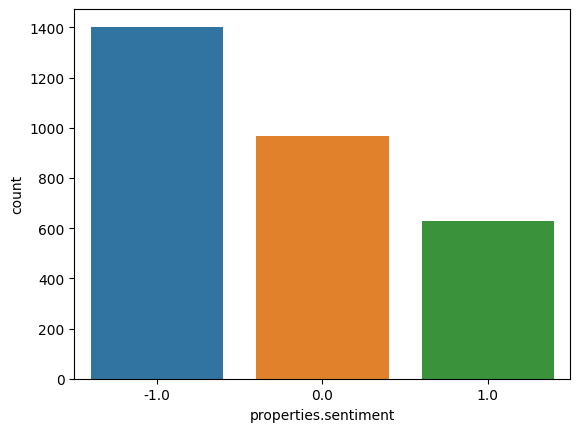

<Figure size 640x480 with 0 Axes>

In [353]:
sns.countplot(x = 'properties.sentiment',data = df)
plt.show()
plt.savefig("image\sentiment.png")

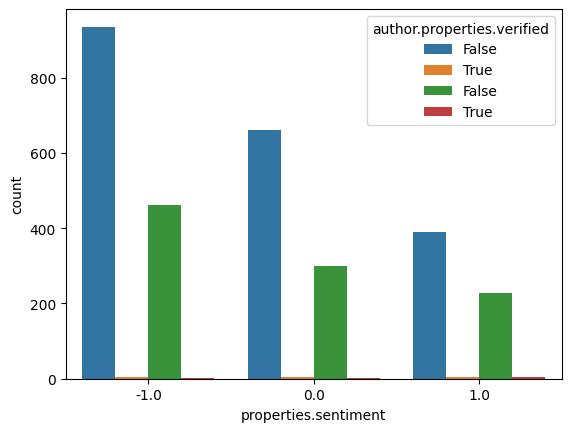

<Figure size 640x480 with 0 Axes>

In [354]:
# count plot properties.sentiment and author.properties.verified
sns.countplot(x='properties.sentiment',hue='author.properties.verified',data=df)
plt.show()
plt.savefig("image\properties.png")

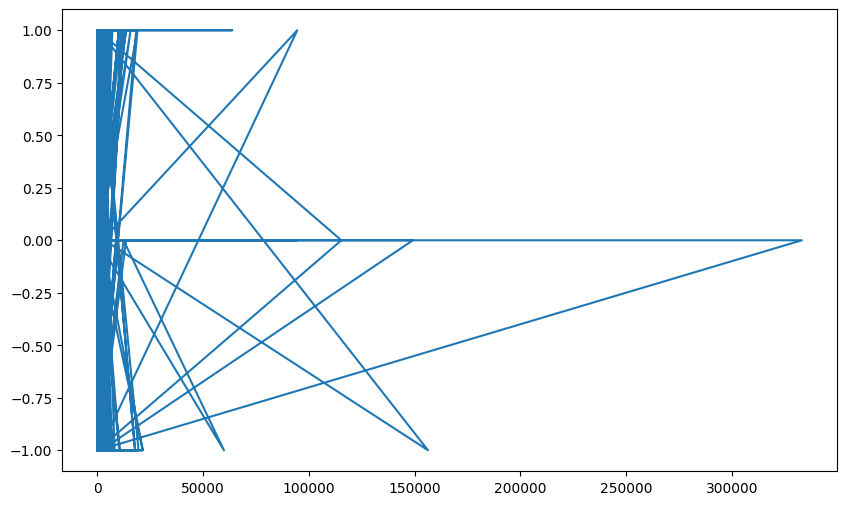

In [355]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df["author.properties.friends"], df["properties.sentiment"])
plt.savefig("image/author properties against properties sentiments plot.png")

In [368]:
# get the location where sentiments on properties were sampled
location_data = df[['location.latitude','location.longitude']]
area_map =  folium.Map(location=[58.17,1.40], zoom_start=10)
heat_map_data = [[row['location.latitude'],row['location.longitude']] for index, row in location_data.iterrows()]

In [370]:
from folium.plugins import HeatMap
# display map
HeatMap(heat_map_data, radius=10).add_to(area_map)

In [372]:
#display the map
area_map;

###  Using input for prediction

In [356]:
df.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


In [357]:
# df["properties"].unique()

In [358]:
df["content.body"].unique()

array(["Can't believe I'm missing Love Island 😩",
       "Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable",
       'How many times does he wonna say the phrase "i deal with shit" #LoveIsland',
       ..., '#NP Shola Ama - Loving My Baby',
       'Could not have had a worse couple days. Failed MOT, lost my passport, and now just found out I sent £300 for my Napa Accom to the wrong acc.',
       "@FHPReading Hi guys, we're from Reading and would love to take your branding to a new level. Get in touch and we'll chat more! #snapchat"],
      dtype=object)

In [359]:
df["properties.sentiment"].unique()

array([ 1., -1.,  0.])

### Creating Sample Input

In [360]:
input_data_dict = {
    
    "author.properties.friends": 114,
    "author.properties.status_count": 1377,
    "author.properties.verified": "True",
    "content.body": "Can't believe I'm missing Love Island 😩",
    "location.country": 'GG',
    "properties.platform": 'twitter',
    "location.latitude": 52.96974444,
    "location.longitude": -1.172266
    
}

In [361]:
input_data_dict

{'author.properties.friends': 114,
 'author.properties.status_count': 1377,
 'author.properties.verified': 'True',
 'content.body': "Can't believe I'm missing Love Island 😩",
 'location.country': 'GG',
 'properties.platform': 'twitter',
 'location.latitude': 52.96974444,
 'location.longitude': -1.172266}

In [362]:
input_data = pd.DataFrame([input_data_dict])

In [363]:
input_data

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude
0,114,1377,True,Can't believe I'm missing Love Island 😩,GG,twitter,52.97,-1.17


In [364]:
save_model_predictor.predict(input_data)

0   -1.00
Name: properties.sentiment, dtype: float64

In [365]:
save_model_predictor.predict(input_data)[0]

-1.0